<center><H1><span style="color:navy">LENDING CLUB CASE STUDY</span></H1></center>

## <span style="color:teal"><b>I. ABOUT THIS CASE STUDY</b></span>

<span style="color:maroon"><b>OBJECTIVE OF THIS CASE STUDY:</b></span><br>

<p>A large Consumer Finance Company in marketplace, facilitating different loans to customers in easier and faster methods through online platforms. In its Business activity, this company is <b>facing huge “Credit Loss” made by the default customers.</b> “Credit Loss” is the amount of money lost by the lenders when the borrowed customers are failed/refused to repay the lend money or absconded with the money they owned. We call these customers as “Defaulters”. 
    
***The company wants to understand the driving factors (or driver variables) behind loan default***. So that, it can utilise this knowledge for its portfolio and risk assessment by scrutinizing its decision making on loan approvals.</p>
<br>

<span style="color:maroon"><b>GOAL:</b></span><br>
 - Find the driving factors behind loan defaults
 - The conclusion of this case study should be cautious on below risk factors
     - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company. Hence, ***the case study conclusion shall not affect the genuine payers***
     - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company. Hence, ***the case study conclusion shall have more accuracy on driving factors of loan defaults to prevent financial loss of the company***
<br>
<br>

<span style="color:maroon"><b>DATA PROVIDED FOR ANALYSIS:</b></span>

The below files are provided for data analysis.<br>
 - A dataset in '.CSV' format contains customer attributes & loan attributes The file size is 33.2MB
 - A Data Dictionary in .'CSV' format with the size 18KB

## <span style="color:teal"><b>II. PHASES OF ANALYSIS</b></span>

1. Importing necessary libraries
2. Data Wrangling
    - Data Loading
    - Data Understanding
    - Data Cleaning
4. Data Analysis with Visualizations
5. Summary

## <span style="color:teal"><b>IMPORTING NECESSARY LIBRARIES</b></span>

In [2]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np
import re

# Libraries for Data Visulation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Libraries to handle warnings
import warnings
warnings.filterwarnings('ignore')

# Common codes
pd.options.display.float_format = "{:,.2f}".format # To make all decimal in dataframe with 2 precisions
pd.set_option('display.max_rows', None)

## <span style="color:Teal"><b>DATA LOADING</b></span>

<b>STEPS IN DATA LOADING:</b>
- Create Dataframe, Load Dataset
- Create a Dataframe copy. It is a good practice to create a dataframe copy before workout, to prevent data damages in main dataframe.

In [3]:
# Create Dataframe, load dataset
loan_main_df = pd.read_csv("casestudy_loan_dataset.csv")

# Create Dataframe copy
df_copy = loan_main_df.copy()
df_copy.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  

[3 rows x 111 columns]

## <span style="color:TEAL"><b>DATA UNDERSTANDING - Shape, Size and Datatypes</b></span>

<b>STEPS IN DATA UNDERSTANDING:</b><br>
1. Create a dataframe copy for Data Understanding purpose
2. Understanding **Shape & Size** of the Dataset
3. Understanding Datatypes

### <span style="color:MAROON"><b>Create Dataframe Copy</b></span>

In [4]:
# Create Dataframe copy for Data Understaning purpose
df_copy_DU = df_copy.copy()
df_copy_DU.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  

[3 rows x 111 columns]

### <span style="color:maroon"><b>Understanding shape of the dataset</b></span>

In [5]:
df_copy_DU.shape

(39717, 111)

In [6]:
df_copy_DU.size

4408587

In [7]:
111*39717

4408587

**Observation:** 
- Dataset has 111 Columns , 39717 records
- Data size 4408587 meaning that each column has only single value, not any list or dictionary data.

### <span style="color:maroon"><b>Understanding datatypes</b></span>

In [8]:
df_copy_DU.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

**Observation:** 
- Out of 111 columns : 74 has float data, 13 has integer data and 24 has object data.

## <span style="color:TEAL"><b>DATA CLEANING, TRANSFORMING - Missing Values, Duplicates, Outliers, Creating New columns, Rearranging Columns</b></span>

<b>STEPS IN DATA CLEANING:</b><br>

1. Handling Missing Values
5. Examine Duplicate data and cleaning
5. Examine Outliers
6. Understanding Columns:
    - List of Columns
    - Categories: Numerical, Categorical and Date
7. Understanding columns with statistical data:

### <span style="color:maroon"><b>Examine Missing Values across Columns</b></span>

In [9]:
# Examine the percentage of missing values in each column

missing_values = df_copy_DU.isnull().mean()*100
missing_df = pd.DataFrame({'column_name' : df_copy_DU.columns,'missing_percentage': missing_values}).sort_values(by="missing_percentage", ascending=False)
missing_df.reset_index(drop=True, inplace=True)
missing_df

column_name  missing_percentage
0         verification_status_joint              100.00
1                  annual_inc_joint              100.00
2              mo_sin_old_rev_tl_op              100.00
3                mo_sin_old_il_acct              100.00
4                           bc_util              100.00
5                    bc_open_to_buy              100.00
6                       avg_cur_bal              100.00
7              acc_open_past_24mths              100.00
8                      inq_last_12m              100.00
9                       total_cu_tl              100.00
10                           inq_fi              100.00
11                 total_rev_hi_lim              100.00
12                         all_util              100.00
13                       max_bal_bc              100.00
14                      open_rv_24m              100.00
15                      open_rv_12m              100.00
16                          il_util              100.00
17                     total_bal_il              100.00
18               mths_since_rcnt_il              100.00
19                      open_il_24m              100.00
20                      open_il_12m              100.00
21                       open_il_6m              100.00
22                      open_acc_6m              100.00
23                      tot_cur_bal              100.00
24                     tot_coll_amt              100.00
25            mo_sin_rcnt_rev_tl_op              100.00
26                   mo_sin_rcnt_tl              100.00
27                         mort_acc              100.00
28              num_rev_tl_bal_gt_0              100.00
29                   total_bc_limit              100.00
30                total_bal_ex_mort              100.00
31                  tot_hi_cred_lim              100.00
32                 percent_bc_gt_75              100.00
33                   pct_tl_nvr_dlq              100.00
34               num_tl_op_past_12m              100.00
35               num_tl_90g_dpd_24m              100.00
36                     num_tl_30dpd              100.00
37                 num_tl_120dpd_2m              100.00
38                         num_sats              100.00
39                    num_rev_accts              100.00
40             mths_since_recent_bc              100.00
41                    num_op_rev_tl              100.00
42                        num_il_tl              100.00
43                        num_bc_tl              100.00
44                      num_bc_sats              100.00
45                  num_actv_rev_tl              100.00
46                   num_actv_bc_tl              100.00
47            num_accts_ever_120_pd              100.00
48   mths_since_recent_revol_delinq              100.00
49            mths_since_recent_inq              100.00
50         mths_since_recent_bc_dlq              100.00
51                        dti_joint              100.00
52       total_il_high_credit_limit              100.00
53      mths_since_last_major_derog              100.00
54                     next_pymnt_d               97.13
55           mths_since_last_record               92.99
56           mths_since_last_delinq               64.66
57                             desc               32.59
58                        emp_title                6.19
59                       emp_length                2.71
60             pub_rec_bankruptcies                1.75
61                     last_pymnt_d                0.18
62       collections_12_mths_ex_med                0.14
63         chargeoff_within_12_mths                0.14
64                       revol_util                0.13
65                        tax_liens                0.10
66                            title                0.03
67               last_credit_pull_d                0.01
68                       pymnt_plan                0.00
69                              url                0.00
70                      loan_status             

<span style="font-size:14px;color:Navy"><b>Observation:<br>
- It is observed that many columns have 100% missing values and even ~90%.
- Bucket the missing counts to conclude column reduction (dropping columns)

<span style="font-size:20px;color:green"><b>Bucketing missing counts:<br>

In [10]:
# Columns having 100% missing values
missing_100percent = missing_df[missing_df['missing_percentage']==100]
print(f"Number of columns having 100% missing values = {missing_100percent.column_name.count()}")

# Columns having 75% to 99% of missing values
missing_75_95_percent = missing_df[(missing_df['missing_percentage']>=90) & (missing_df['missing_percentage']<=99)]
print(f"Number of columns having 75% to 99% missing values = {missing_75_95_percent.column_name.count()}")

# Columns having 50% to 75% of missing values
missing_50_75_percent = missing_df[(missing_df['missing_percentage']>=50) & (missing_df['missing_percentage']<75)]
print(f"Number of columns having 50% to 75% missing values = {missing_50_75_percent.column_name.count()}")

# Columns having below 50% but not 0% of missing values
missing_below_50 = missing_df[(missing_df['missing_percentage']<50) & (missing_df['missing_percentage']!=0)]
print(f"Number of columns having below 50% missing values = {missing_below_50.column_name.count()}")

# Columns having below 0 missing values
missing_0 = missing_df[(missing_df['missing_percentage']==0)]
print(f"Number of columns having below 50% missing values = {missing_0.column_name.count()}")

Number of columns having 100% missing values = 54
Number of columns having 75% to 99% missing values = 2
Number of columns having 50% to 75% missing values = 1
Number of columns having below 50% missing values = 11
Number of columns having below 50% missing values = 43


<span style="font-size:14px;color:navy"><b>Observation:<br>
 - It is observed, out of 111 columns, 56 columns having above 90% of missing values. In which, 54 have 100% missing values. Nearly, 50% of columns having complete missing values.
 - In remaining 55 columns, 12 having below 50% missings and 43 having 0% missing.

|% of Missing Values | No. of Columns |
| :- | :- |
|100% | 54 |
|75 to 99%| 2 |
|50 to 75%| 1 |
|Below 50% but not 0% | 11 |
|0% | 43 |
|<b>Total</b>|<b>111 </b>|

<span style="font-size:14px;color:navy"><b>Conclusion:</b></span><br>
 - Drop 56 columns having missing values above 75%.

<span style="font-size:20px;color:green"><b>Dropping Columns having above 75% Missing Values<br>

In [11]:
# Get columns list having above 75% of missing values
columns_del = missing_df[(missing_df['missing_percentage']>=75)]['column_name'].to_list()

# Dropping 56 Columns
print("Shape of the data before dropping columns : ", df_copy_DU.shape)
try:
    df_copy_DU.drop(columns_del, axis=1, inplace=True)
    print("Shape of the data after dropping columns : ", df_copy_DU.shape)
except:
    print("Columns already dropped")

Shape of the data before dropping columns :  (39717, 111)
Shape of the data after dropping columns :  (39717, 55)


### <span style="color:maroon"><b>Examine Missing values across Rows</b></span>

- This section is to find the how many missing values in each row. As of now, dataframe have 55 columns. 
- Let us find how many missing values in each row (out of 55)

In [12]:
df_copy_DU.isnull().sum(axis=1).sort_values(ascending=False)

39659    6
39715    6
39714    6
39660    6
39704    5
4714     5
11282    5
39700    5
39650    5
39642    5
39688    5
39706    5
39686    5
39709    5
39710    5
14839    5
39676    5
27812    4
8796     4
16690    4
22443    4
3220     4
16719    4
31421    4
5009     4
39716    4
3255     4
22374    4
8738     4
27715    4
12511    4
1640     4
12414    4
8714     4
1623     4
22241    4
28186    4
16907    4
22566    4
16557    4
27685    4
16584    4
23102    4
16352    4
27385    4
8930     4
16372    4
16399    4
22975    4
22950    4
16442    4
3093     4
27472    4
16473    4
22837    4
16498    4
3127     4
16518    4
27514    4
31466    4
27569    4
3161     4
4945     4
12703    4
27669    4
22171    4
10265    4
22116    4
31112    4
21615    4
10340    4
21589    4
21523    4
21521    4
17643    4
11894    4
1424     4
17741    4
21404    4
8408     4
17005    4
1400     4
3634     4
11779    4
7591     4
11747    4
4665     4
4664     4
21229    4
11741    4
7603     4

<span style="font-size:14px;color:navy"><b>Observation:<br>
 - It is observed that maximum count of missing value in a row is 6 out of 55 (6/55). 
 - Hence, there is not need for dropping. 

### <span style="color:maroon"><b>Column Reduction - Removing unnecessary columns</b></span>
- The purpose of this section is to remove the unnecessary columns which are not useful for analysis. It will help to increase accuracy rate of analysis

In [13]:
unique_values = df_copy_DU.nunique()
unique_df = pd.DataFrame({'column_name' : df_copy_DU.columns, 'nunique_values':unique_values}).sort_values(by="nunique_values", ascending=False)
unique_df.reset_index(drop=True, inplace=True)
unique_df

column_name  nunique_values
0                           id           39717
1                          url           39717
2                    member_id           39717
3                  total_pymnt           37850
4              total_pymnt_inv           37518
5                total_rec_int           35148
6              last_pymnt_amnt           34930
7                    emp_title           28820
8                         desc           26526
9                    revol_bal           21711
10                       title           19615
11                 installment           15383
12             funded_amnt_inv            8205
13             total_rec_prncp            7976
14                  annual_inc            5318
15                  recoveries            4040
16                         dti            2868
17     collection_recovery_fee            2616
18          total_rec_late_fee            1356
19               out_prncp_inv            1138
20                   out_prncp            1137
21                  revol_util            1089
22                 funded_amnt            1041
23                   loan_amnt             885
24                    zip_code             823
25            earliest_cr_line             526
26                    int_rate             371
27          last_credit_pull_d             106
28                last_pymnt_d             101
29      mths_since_last_delinq              95
30                   total_acc              82
31                     issue_d              55
32                  addr_state              50
33                    open_acc              40
34                   sub_grade              35
35                     purpose              14
36                 delinq_2yrs              11
37                  emp_length              11
38              inq_last_6mths               9
39                       grade               7
40                     pub_rec               5
41              home_ownership               5
42                 loan_status               3
43         verification_status               3
44        pub_rec_bankruptcies               3
45                        term               2
46         initial_list_status               1
47                  pymnt_plan               1
48  collections_12_mths_ex_med               1
49                 policy_code               1
50            application_type               1
51              acc_now_delinq               1
52    chargeoff_within_12_mths               1
53                 delinq_amnt               1
54                   tax_liens               1

In [14]:
print("Shape of the data before dropping columns : ", df_copy_DU.shape)

try:
    # Removing Columns having one unique value
    col_1unique = unique_df[unique_df['nunique_values'] == 1]['column_name'].to_list()
    df_copy_DU.drop(col_1unique, axis=1, inplace=True)
    
    # Removing columns having nominal data which might not significance for analysis
    nominal_cols = ['member_id','emp_title','url','desc','title']
    df_copy_DU.drop(nominal_cols, axis=1, inplace=True)
    
    # Removing columns having masked data 
    masked_cols = ['zip_code']
    df_copy_DU.drop(masked_cols, axis=1, inplace=True)
    
    # Removing columns having details of after loan
    other_cols = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line', 'funded_amnt_inv','inq_last_6mths','last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','mths_since_last_delinq','open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec','recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']
    df_copy_DU.drop(other_cols, axis=1, inplace=True)
    
    
    print("Shape of the data after dropping columns : ", df_copy_DU.shape)
except:
    print("Column dropped")

Shape of the data before dropping columns :  (39717, 55)
Shape of the data after dropping columns :  (39717, 18)


In [15]:
df_copy_DU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

### <span style="color:maroon"><b>Re-Examine missing values</b></span>

In [16]:
df_copy_DU.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

It is observed that emp_length and pub_rec_bankruptcies having null values

In [17]:
# Replacing null values in emp_lenth might affect data accuracy. Hence, rows having nullvalues shall be removed
print("Dataset shape before removing : ", df_copy_DU.shape)
df_copy_DU.dropna(subset=['emp_length'], inplace=True)
print("Dataset shape after removing : ", df_copy_DU.shape)

Dataset shape before removing :  (39717, 18)
Dataset shape after removing :  (38642, 18)


In [18]:
print(df_copy_DU['pub_rec_bankruptcies'].value_counts())

# Replacing null values in 'pub_rec_bankruptcies' column with mode 0.0
df_copy_DU.pub_rec_bankruptcies.fillna(0.00,inplace=True)

pub_rec_bankruptcies
0.00    36375
1.00     1563
2.00        7
Name: count, dtype: int64


In [19]:
df_copy_DU.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### <span style="color:maroon"><b>Examine Duplicates</b></span>

In [20]:
print('Duplicates count : ',df_copy_DU.duplicated().sum())

Duplicates count :  0


- Now all misssing values are treated and dataset is not zero missing values.
- The next step is to examine the outliers. But before examine, it is better to correcting datatypes and data formats of the columns. The reason is, for instance, if a column is categorical column but incorrectly in 'int' type, then it will affect the outlier examination. Eg., int_rate in this dataset is in "object" type, but it has to be in 'float'.
- Hence, before examining outliers, datatypes and data formats shall be corrected

### <span style="color:maroon"><b>Correcting Datatypes and Date formats of Columns</b></span>

In [21]:
df_copy_DU.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
4  1075358       3000         3000   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT   24,000.00            Verified  Dec-11   
1        C4   < 1 year           RENT   30,000.00     Source Verified  Dec-11   
2        C5  10+ years           RENT   12,252.00        Not Verified  Dec-11   
3        C1  10+ years           RENT   49,200.00     Source Verified  Dec-11   
4        B5     1 year           RENT   80,000.00     Source Verified  Dec-11   

   loan_status         purpose addr_state   dti  pub_rec_bankruptcies  
0   Fully Paid     credit_card         AZ 27.65                  0.00  
1  Charged Off             car         GA  1.00                  0.00  
2   Fully Paid  small_business         IL  8.72                  0.00  
3   Fully Paid           other         CA 20.00                  0.00  
4      Current           other         OR 17.94                  0.00

In [22]:
df_copy_DU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [23]:
# Column : term - Remove word 'month' and convert to int
df_copy_DU['term'] = df_copy_DU['term'] .apply(lambda x: int(x.replace(' months',''))).astype('int')

# Column : int_rate - Remove '%' symbol and covert to float
df_copy_DU['int_rate'] = df_copy_DU['int_rate'].apply(lambda x:str(x).replace('%','')).astype('float')


# Column : emp_length - Replacing special characters and alphabets with space and convert to float
df_copy_DU['emp_length']=df_copy_DU['emp_length'].apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

# Column : issue_d - Coverting object type to date type
df_copy_DU.issue_d=pd.to_datetime(df_copy_DU.issue_d,format='%b-%y')

# 
df_copy_DU['purpose']=df_copy_DU['purpose'].astype('category')
df_copy_DU['addr_state']=df_copy_DU['addr_state'].astype('category')

In [24]:
df_copy_DU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  object        
 7   sub_grade             38642 non-null  object        
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  object        
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  object        
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

In [25]:
df_copy_DU.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2       10.00           RENT   24,000.00            Verified   
1        C4        0.50           RENT   30,000.00     Source Verified   
2        C5       10.00           RENT   12,252.00        Not Verified   
3        C1       10.00           RENT   49,200.00     Source Verified   
4        B5        1.00           RENT   80,000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65   
1 2011-12-01  Charged Off             car         GA  1.00   
2 2011-12-01   Fully Paid  small_business         IL  8.72   
3 2011-12-01   Fully Paid           other         CA 20.00   
4 2011-12-01      Current           other         OR 17.94   

   pub_rec_bankruptcies  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

### <span style="color:maroon"><b>Creating New Columns</b></span>

In [26]:
# Create Month and Year column from issue_d

df_copy_DU['issue_month']=df_copy_DU['issue_d'].dt.month
df_copy_DU['issue_year']=df_copy_DU['issue_d'].dt.year


In [27]:
df_copy_DU.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2       10.00           RENT   24,000.00            Verified   
1        C4        0.50           RENT   30,000.00     Source Verified   
2        C5       10.00           RENT   12,252.00        Not Verified   
3        C1       10.00           RENT   49,200.00     Source Verified   
4        B5        1.00           RENT   80,000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65   
1 2011-12-01  Charged Off             car         GA  1.00   
2 2011-12-01   Fully Paid  small_business         IL  8.72   
3 2011-12-01   Fully Paid           other         CA 20.00   
4 2011-12-01      Current           other         OR 17.94   

   pub_rec_bankruptcies  issue_month  issue_year  
0                  0.00           12        2011  
1                  0.00           12        2011  
2                  0.00           12        2011  
3                  0.00           12        2011  
4                  0.00           12        2011

In [28]:
df_copy_DU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  object        
 7   sub_grade             38642 non-null  object        
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  object        
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  object        
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

### <span style="color:maroon"><b>Categorize the columns based on datatype and its nature</b></span>

In [29]:
categorical_col = ['grade','sub_grade','home_ownership','verification_status','purpose','addr_state']
numercial_col=['term','loan_amnt','int_rate','emp_length','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_col=['loan_status']

In [30]:
df_copy_DU[categorical_col].nunique()

grade                   7
sub_grade              35
home_ownership          5
verification_status     3
purpose                14
addr_state             50
dtype: int64

In [31]:
df_copy_DU[numercial_col].nunique()

term                       2
loan_amnt                880
int_rate                 371
emp_length                11
annual_inc              5100
dti                     2863
pub_rec_bankruptcies       3
issue_year                 5
issue_month               12
dtype: int64

### <span style="color:maroon"><b>Rearranging Columns for Analysis</b></span>

In [32]:
columns_list = ['id','purpose','loan_amnt','funded_amnt','int_rate','term','installment',
                'issue_d','issue_month','issue_year',
                'addr_state','annual_inc','home_ownership','verification_status','loan_status','home_ownership',
                'grade', 'sub_grade', 'emp_length','dti','pub_rec_bankruptcies']
rearranged_loan_data = df_copy_DU[columns_list]
new_loan_data = rearranged_loan_data.copy()
new_loan_data.head()

id         purpose  loan_amnt  funded_amnt  int_rate  term  \
0  1077501     credit_card       5000         5000     10.65    36   
1  1077430             car       2500         2500     15.27    60   
2  1077175  small_business       2400         2400     15.96    36   
3  1076863           other      10000        10000     13.49    36   
4  1075358           other       3000         3000     12.69    60   

   installment    issue_d  issue_month  issue_year  ... annual_inc  \
0       162.87 2011-12-01           12        2011  ...  24,000.00   
1        59.83 2011-12-01           12        2011  ...  30,000.00   
2        84.33 2011-12-01           12        2011  ...  12,252.00   
3       339.31 2011-12-01           12        2011  ...  49,200.00   
4        67.79 2011-12-01           12        2011  ...  80,000.00   

  home_ownership verification_status  loan_status home_ownership grade  \
0           RENT            Verified   Fully Paid           RENT     B   
1           RENT     Source Verified  Charged Off           RENT     C   
2           RENT        Not Verified   Fully Paid           RENT     C   
3           RENT     Source Verified   Fully Paid           RENT     C   
4           RENT     Source Verified      Current           RENT     B   

  sub_grade emp_length   dti  pub_rec_bankruptcies  
0        B2      10.00 27.65                  0.00  
1        C4       0.50  1.00                  0.00  
2        C5      10.00  8.72                  0.00  
3        C1      10.00 20.00                  0.00  
4        B5       1.00 17.94                  0.00  

[5 rows x 21 columns]

In [33]:
loan_main_df.shape

(39717, 111)

In [34]:
new_loan_data.shape

(38642, 21)

### <span style="color:maroon"><b>Examine Statistical Data</b></span>

In [35]:
new_loan_data.describe()

id  loan_amnt  funded_amnt  int_rate      term  installment  \
count    38,642.00  38,642.00    38,642.00 38,642.00 38,642.00    38,642.00   
mean    681,040.36  11,291.62    11,017.10     12.05     42.43       326.76   
min      54,734.00     500.00       500.00      5.42     36.00        15.69   
25%     513,435.00   5,500.00     5,500.00      9.32     36.00       168.44   
50%     662,770.50  10,000.00     9,950.00     11.86     36.00       282.83   
75%     836,491.25  15,000.00    15,000.00     14.59     60.00       434.40   
max   1,077,501.00  35,000.00    35,000.00     24.59     60.00     1,305.19   
std     211,304.55   7,462.14     7,193.04      3.72     10.63       209.14   

                             issue_d  issue_month  issue_year   annual_inc  \
count                          38642    38,642.00   38,642.00    38,642.00   
mean   2010-10-31 02:15:54.360540416         7.17    2,010.32    69,608.28   
min              2007-06-01 00:00:00         1.00    2,007.00     4,000.00   
25%              2010-05-01 00:00:00         4.00    2,010.00    41,400.00   
50%              2011-02-01 00:00:00         7.00    2,011.00    60,000.00   
75%              2011-08-01 00:00:00        10.00    2,011.00    83,199.99   
max              2011-12-01 00:00:00        12.00    2,011.00 6,000,000.00   
std                              NaN         3.40        0.88    64,253.20   

       emp_length       dti  pub_rec_bankruptcies  
count   38,642.00 38,642.00             38,642.00  
mean         5.03     13.33                  0.04  
min          0.50      0.00                  0.00  
25%          2.00      8.20                  0.00  
50%          4.00     13.41                  0.00  
75%          9.00     18.59                  0.00  
max         10.00     29.99                  2.00  
std          3.48      6.67                  0.20

In [36]:
new_loan_data[categorical_col].describe()

grade sub_grade home_ownership home_ownership verification_status  \
count   38642     38642          38642          38642               38642   
unique      7        35              5              5                   3   
top         B        B3           RENT           RENT        Not Verified   
freq    11686      2835          18488          18488               16498   

                   purpose addr_state  
count                38642      38642  
unique                  14         50  
top     debt_consolidation         CA  
freq                 18242       6911

### <span style="color:maroon"><b>Examine Outliers</b></span>

In [37]:
# Loan Amount
px.box(new_loan_data,x='loan_amnt',width=750,height=350,
       title=' Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

# Funded Amount
px.box(new_loan_data,x='funded_amnt',width=750,height=350,
       title='Examine Funded Amount',labels={'funded_amnt':'Funded Amount'}).show()

#Interest Rate
px.box(new_loan_data,x='int_rate',width=750,height=350,
       title='Examine of Interest Rate',labels={'int_rate':'Interest Rate'}).show()

# Installment
px.box(new_loan_data,x='installment',width=750,height=350,
       title='Examine of Installment',labels={'installment':'Installment'}).show()

# Annual Income
px.box(new_loan_data,x='annual_inc',width=750,height=350,
       title='Examine of Annual Income',labels={'annual_inc':'Annual Income'}).show()

In [40]:
# Removing rows having annual income above 2M
new_loan_data = new_loan_data[new_loan_data['annual_inc']<200000]

**Observation:**
- Though the annual income has outliers, there is no fixation of an individual's annual income from avail loans.
- Also, in installments, it depends on terms. 
- In Funded amount, Loan amount and Interest rate, there is no much difference between upper fence and max values. 
- Hence, no need to remove.

## <span style="color:TEAL"><b>UNIVARIATE ANALYSIS</b></span>

### <span style="color:maroon"><b>Distribution of Year</b></span>
- To understand in which year company provided more loan

issue_year
2011   54.09
2010   29.03
2009   12.19
2008    4.05
2007    0.63
Name: count, dtype: float64


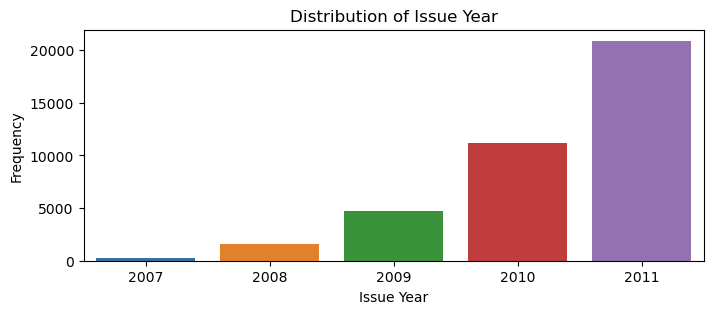

In [51]:
# Distribution of Issue Year
print(new_loan_data['issue_year'].value_counts()*100/new_loan_data['issue_year'].count())

plt.figure(figsize=(8,3))
sns.countplot(df_copy_DU, x="issue_year")
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.title('Distribution of Issue Year',fontsize=12)
plt.show()

**Observation:**
- In year 2011, the company has provided higher loan (55%)

### <span style="color:maroon"><b>Distribution of Month</b></span>
- To understand in which month company provided more loan

issue_month
12   11.25
11   10.47
10    9.79
9     9.15
8     8.92
7     8.74
6     8.23
5     7.55
4     7.16
3     6.81
1     6.02
2     5.90
Name: count, dtype: float64


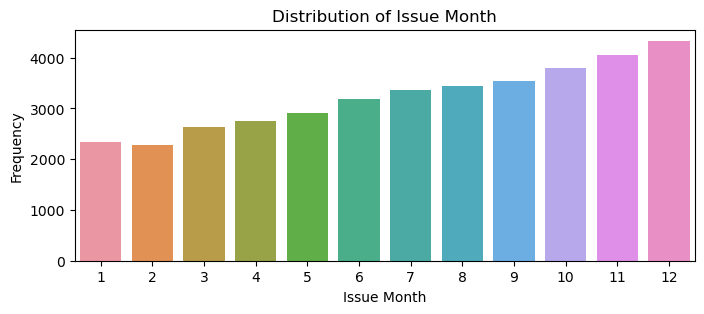

In [52]:
print(new_loan_data['issue_month'].value_counts()*100/new_loan_data['issue_month'].count())

plt.figure(figsize=(8,3))
sns.countplot(df_copy_DU, x="issue_month")
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.title('Distribution of Issue Month',fontsize=12)
plt.show()

**Observation:**
- In months 5 and above, the company has provided higher loan (11%)

### <span style="color:maroon"><b>Distribution of Purpose</b></span>

purpose
debt_consolidation   47.41
credit_card          12.97
other                 9.91
home_improvement      7.24
major_purchase        5.47
small_business        4.57
car                   3.90
wedding               2.42
medical               1.71
moving                1.45
house                 0.94
vacation              0.93
educational           0.83
renewable_energy      0.24
Name: count, dtype: float64


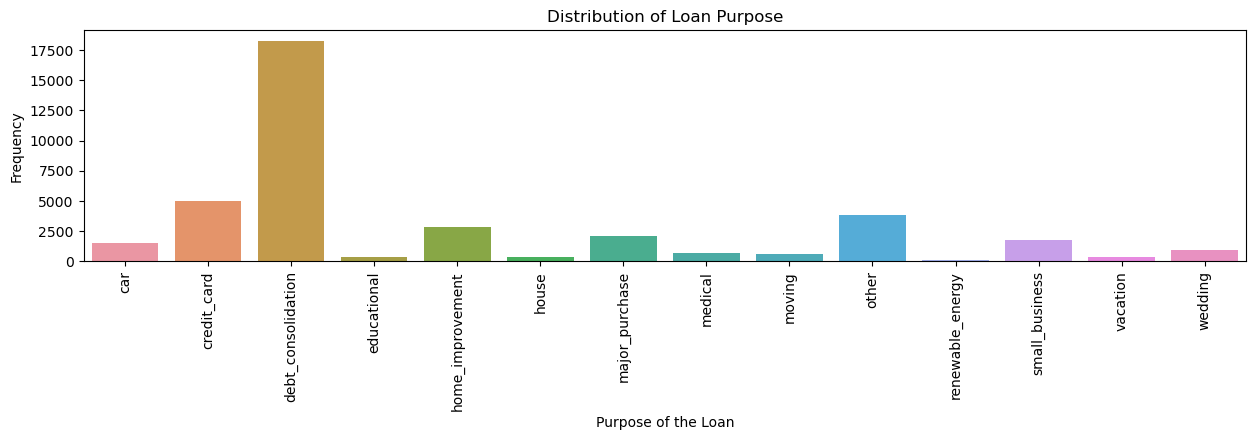

In [56]:
print(new_loan_data['purpose'].value_counts()*100/new_loan_data['purpose'].count())

plt.figure(figsize=(15,3))
sns.countplot(df_copy_DU, x="purpose")
plt.xlabel('Purpose of the Loan')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Purpose',fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Observation:**
- For debt_consolidation, borrowers lend money (47%). To the next, credit card (13%)

### <span style="color:maroon"><b>Distribution of Loan Status</b></span>

loan_status
Fully Paid    83.11
Charged Off   14.05
Current        2.84
Name: count, dtype: float64


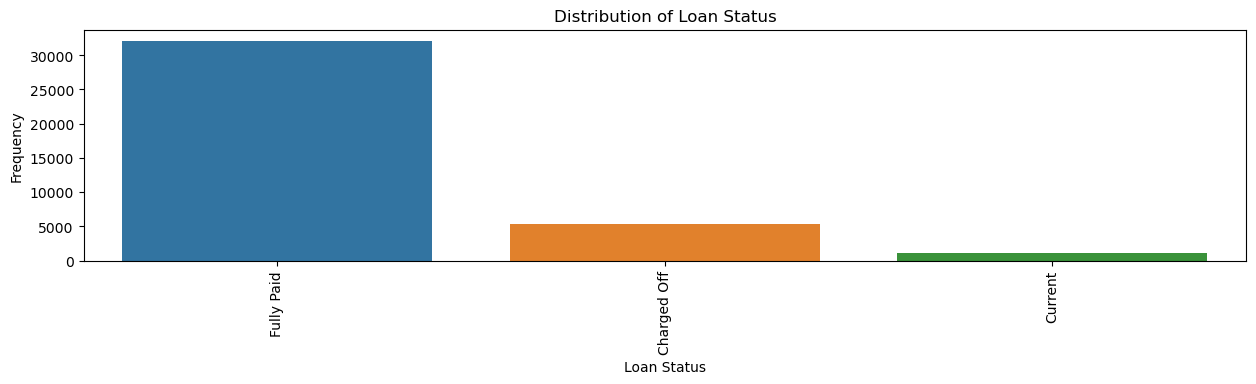

In [57]:
print(new_loan_data['loan_status'].value_counts()*100/new_loan_data['loan_status'].count())

plt.figure(figsize=(15,3))
sns.countplot(df_copy_DU, x="loan_status")
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status',fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Observation:**
- 14% of customers are charged off

### <span style="color:maroon"><b>Distribution of Verification Status</b></span>

verification_status
Not Verified      43.08
Verified          31.66
Source Verified   25.25
Name: count, dtype: float64


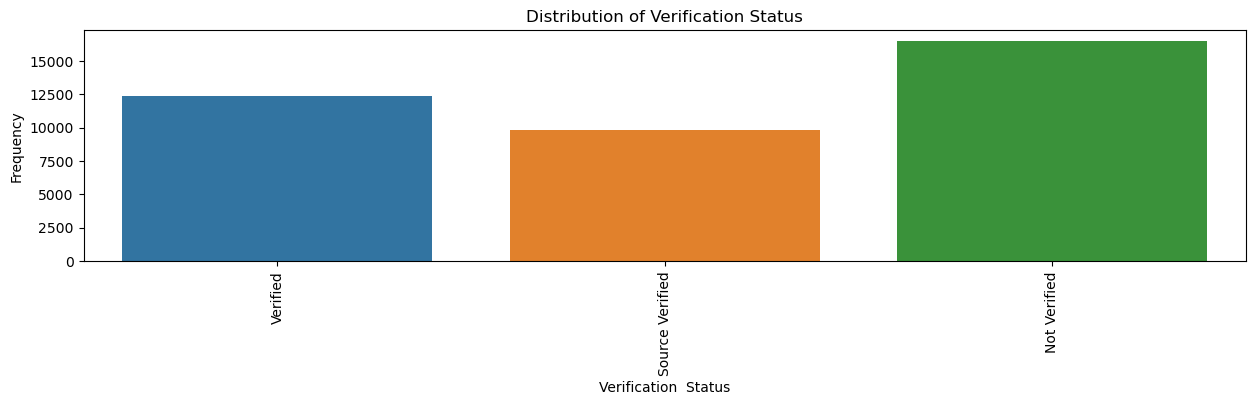

In [59]:
print(new_loan_data['verification_status'].value_counts()*100/new_loan_data['verification_status'].count())

plt.figure(figsize=(15,3))
sns.countplot(df_copy_DU, x="verification_status")
plt.xlabel('Verification  Status')
plt.ylabel('Frequency')
plt.title('Distribution of Verification Status',fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Observation**
- It is observation, the company has provided loan without verification (43%)
- It is higher than verified. It is noticeable remark

## <span style="color:TEAL"><b>BIVARIATE ANALYSIS</b></span>

### <span style="color:maroon"><b>Loan status vs Verification status</b></span>

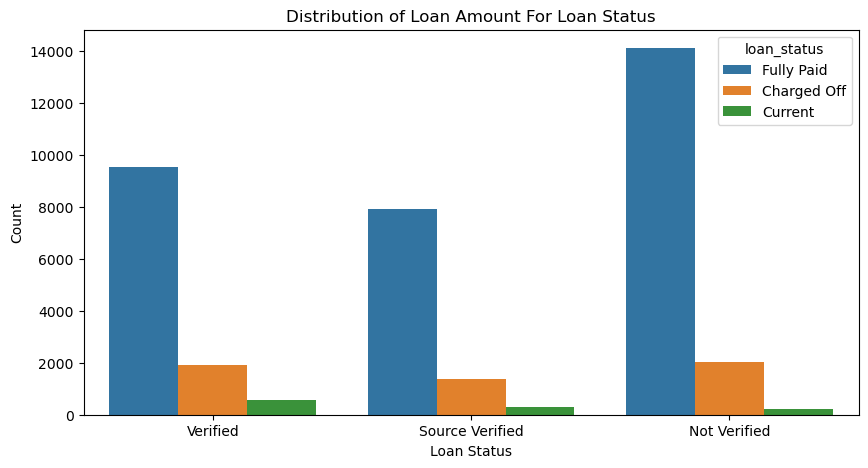

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=new_loan_data,x='verification_status',hue='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount For Loan Status',fontsize=12)
plt.show()

It is observed, not verified customers has high charged off remarks.

### <span style="color:maroon"><b>Annual Income and Loan Status</b></span>

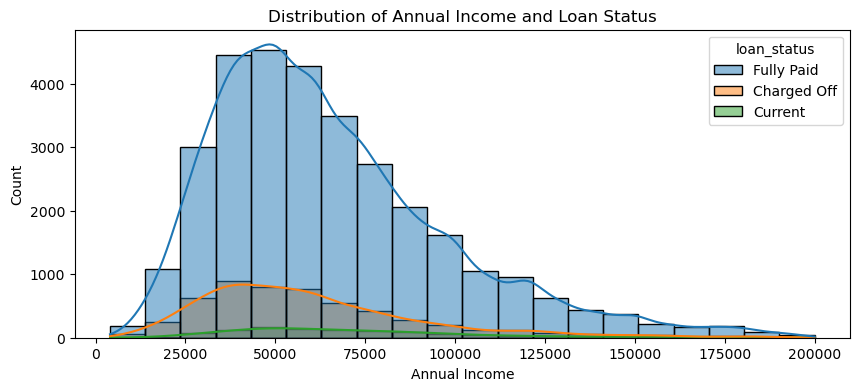

In [70]:
# Distribution of Annual Income and Loan Status
plt.figure(figsize=(10,4))
sns.histplot(data=new_loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income and Loan Status',fontsize=12)
plt.show()

It is observed that, customers with annual income between 25000 to 75000 are more remarked for Charged off

### <span style="color:maroon"><b>Loan Status and Loan Purpose</b></span>

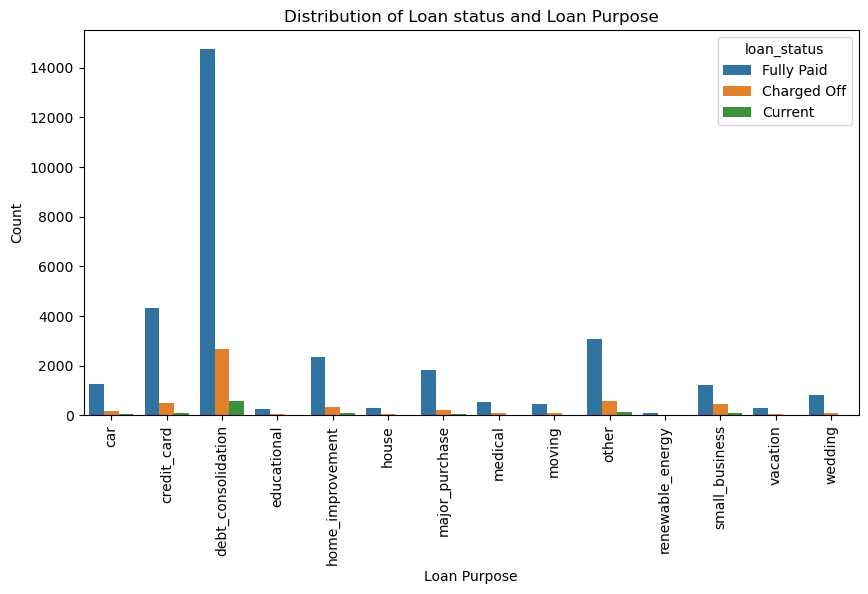

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(data=new_loan_data,x='purpose',hue='loan_status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan status and Loan Purpose',fontsize=12)
plt.xticks(rotation=90)
plt.show()

It is observed that customers who lend for purpose of Debt Consolidation, Credit Card, Small Business and Home improvment have significant remark on charged off.

## <span style="color:TEAL"><b>CONCLUSION:</b></span>

Based on Analysis, the following observation were made.
 - From the given record, it is observed that 14% of customers are charged off.
 - Customers are mostly lend money for the purposes of debt_consolidation, borrowers lend money (47%). To the next, credit card (13%).
 - The customers with annual income between 25000 to 75000 are more remarked for Charged off.
 - Not verified customers has high charged off remarks.
 - The customers who lend for purpose of Debt Consolidation, Credit Card, Small Business and Home improvment have significant remark on charged off.